In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name


    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kavaratti
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | lagoa
Processing Record 7 of Set 1 | alyangula
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | arcachon
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | te anau
Processing Record 18 of Set 1 | limon
Processing Record 19 of Set 1 | ust-tsilma
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | alim
Processing Record 23 of Set 1 | sabha
Processi

Processing Record 38 of Set 4 | cap malheureux
Processing Record 39 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 40 of Set 4 | bianzhuang
Processing Record 41 of Set 4 | komsomolskiy
Processing Record 42 of Set 4 | general roca
Processing Record 43 of Set 4 | kangasala
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | arlit
Processing Record 46 of Set 4 | ilula
Processing Record 47 of Set 4 | mackenzie
Processing Record 48 of Set 4 | belyy yar
Processing Record 49 of Set 4 | gamba
Processing Record 50 of Set 4 | palmas
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | djougou
Processing Record 3 of Set 5 | viedma
Processing Record 4 of Set 5 | eyl
Processing Record 5 of Set 5 | ulladulla
Processing Record 6 of Set 5 | bitam
Processing Record 7 of Set 5 | kyshtovka
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | bargal
City not found. Skipping...

Processing Record 21 of Set 8 | fairbanks
Processing Record 22 of Set 8 | khani
Processing Record 23 of Set 8 | yar-sale
Processing Record 24 of Set 8 | grong
Processing Record 25 of Set 8 | chama
Processing Record 26 of Set 8 | pyaozerskiy
Processing Record 27 of Set 8 | kosh-agach
Processing Record 28 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 29 of Set 8 | taywarah
Processing Record 30 of Set 8 | san cristobal
Processing Record 31 of Set 8 | bundaberg
Processing Record 32 of Set 8 | port shepstone
Processing Record 33 of Set 8 | agadir
Processing Record 34 of Set 8 | praia
Processing Record 35 of Set 8 | haukipudas
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | horqueta
Processing Record 38 of Set 8 | minot
Processing Record 39 of Set 8 | mamallapuram
Processing Record 40 of Set 8 | srednekolymsk
Processing Record 41 of Set 8 | tawnat
City not found. Skipping...
Processing Record 42 of Set 8 | nynashamn
Processing Record 43 of Set 8 

Processing Record 9 of Set 12 | dingle
Processing Record 10 of Set 12 | monster
Processing Record 11 of Set 12 | biak
Processing Record 12 of Set 12 | tres arroyos
Processing Record 13 of Set 12 | synya
Processing Record 14 of Set 12 | ilovlya
Processing Record 15 of Set 12 | conceicao do araguaia
Processing Record 16 of Set 12 | luba
Processing Record 17 of Set 12 | lacolle
Processing Record 18 of Set 12 | balkhash
Processing Record 19 of Set 12 | tevaitoa
Processing Record 20 of Set 12 | necochea
Processing Record 21 of Set 12 | ostrovnoy
Processing Record 22 of Set 12 | antsla
Processing Record 23 of Set 12 | atikokan
Processing Record 24 of Set 12 | bogo
Processing Record 25 of Set 12 | zhigalovo
Processing Record 26 of Set 12 | makakilo city
Processing Record 27 of Set 12 | lima
Processing Record 28 of Set 12 | yabelo
Processing Record 29 of Set 12 | kozhva
Processing Record 30 of Set 12 | lauf
Processing Record 31 of Set 12 | abu dhabi
Processing Record 32 of Set 12 | mega
Proces

In [7]:
#Print Data list
city_data

[{'City': 'Kavaratti',
  'Lat': 10.5669,
  'Lng': 72.642,
  'Max Temp': 83.39,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 19.28,
  'Country': 'IN',
  'Date': '2022-06-21 17:06:38'},
 {'City': 'Avarua',
  'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 78.85,
  'Humidity': 89,
  'Cloudiness': 75,
  'Wind Speed': 8.05,
  'Country': 'CK',
  'Date': '2022-06-21 17:06:38'},
 {'City': 'Tuatapere',
  'Lat': -46.1333,
  'Lng': 167.6833,
  'Max Temp': 36.88,
  'Humidity': 82,
  'Cloudiness': 0,
  'Wind Speed': 4.34,
  'Country': 'NZ',
  'Date': '2022-06-21 17:06:38'},
 {'City': 'New Norfolk',
  'Lat': -42.7826,
  'Lng': 147.0587,
  'Max Temp': 43.88,
  'Humidity': 85,
  'Cloudiness': 47,
  'Wind Speed': 1.01,
  'Country': 'AU',
  'Date': '2022-06-21 17:06:39'},
 {'City': 'Hobart',
  'Lat': -42.8794,
  'Lng': 147.3294,
  'Max Temp': 44.22,
  'Humidity': 87,
  'Cloudiness': 33,
  'Wind Speed': 8.05,
  'Country': 'AU',
  'Date': '2022-06-21 17:02:39'},
 {'City': 'Lagoa',
  'Lat': 39.

In [8]:
# Print Data type
type(city_data)

list

In [9]:
# Print length of dataset
print(len(city_data))

560


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,83.39,79,100,19.28,IN,2022-06-21 17:06:38
1,Avarua,-21.2078,-159.7750,78.85,89,75,8.05,CK,2022-06-21 17:06:38
2,Tuatapere,-46.1333,167.6833,36.88,82,0,4.34,NZ,2022-06-21 17:06:38
3,New Norfolk,-42.7826,147.0587,43.88,85,47,1.01,AU,2022-06-21 17:06:39
4,Hobart,-42.8794,147.3294,44.22,87,33,8.05,AU,2022-06-21 17:02:39


In [11]:
# Reset column order
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [12]:
# Set new column order 
city_order_df = city_data_df[new_column_order]
city_order_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2022-06-21 17:06:38,10.5669,72.6420,83.39,79,100,19.28
1,Avarua,CK,2022-06-21 17:06:38,-21.2078,-159.7750,78.85,89,75,8.05
2,Tuatapere,NZ,2022-06-21 17:06:38,-46.1333,167.6833,36.88,82,0,4.34
3,New Norfolk,AU,2022-06-21 17:06:39,-42.7826,147.0587,43.88,85,47,1.01
4,Hobart,AU,2022-06-21 17:02:39,-42.8794,147.3294,44.22,87,33,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

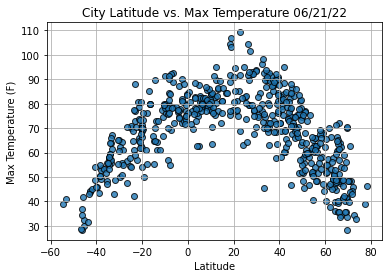

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_temp.png")

# Show plot.
plt.show()

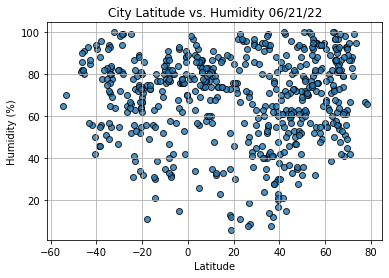

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_humidity.png")

# Show plot.
plt.show()

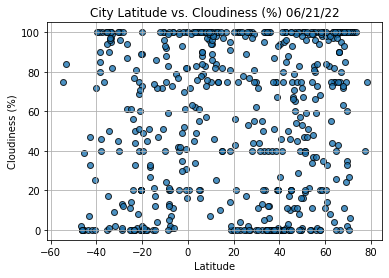

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/City_lat_vs_cloudiness.png")

# Show plot.
plt.show()

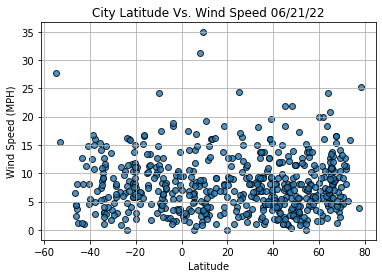

In [18]:
# Build scatter plot for city lat vs. wind speed
plt.scatter(lats,
            wind_speed,
            marker = "o",
            edgecolors = "black",
            alpha = .8)

# Create title, labels and grid 
plt.title("City Latitude Vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

# Save figure
plt.savefig("weather_data/City_lat_vs_windspeed")

In [19]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Use loc to get 14th row 
index13 = city_data_df.loc[13]
index13

City                     Khatanga
Lat                       71.9667
Lng                         102.5
Max Temp                    46.02
Humidity                       79
Cloudiness                    100
Wind Speed                  10.67
Country                        RU
Date          2022-06-21 17:06:41
Name: 13, dtype: object

In [22]:
# Lat greater than >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,83.39,79,100,19.28,IN,2022-06-21 17:06:38
5,Lagoa,39.0500,-27.9833,63.64,81,67,19.57,PT,2022-06-21 17:06:39
11,Saint Anthony,45.0205,-93.2180,84.11,60,20,18.41,US,2022-06-21 17:06:41
13,Khatanga,71.9667,102.5000,46.02,79,100,10.67,RU,2022-06-21 17:06:41
14,Arcachon,44.5875,-1.0519,82.42,60,0,8.05,FR,2022-06-21 17:06:42


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

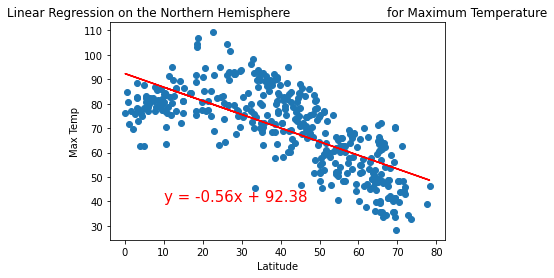

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

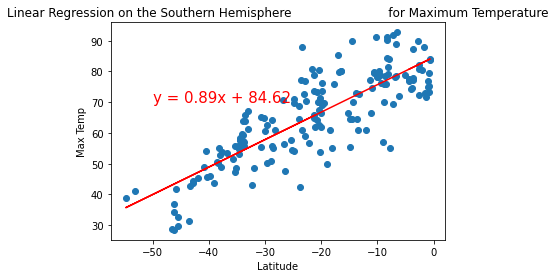

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,70))

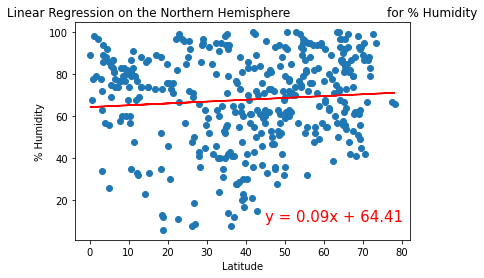

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

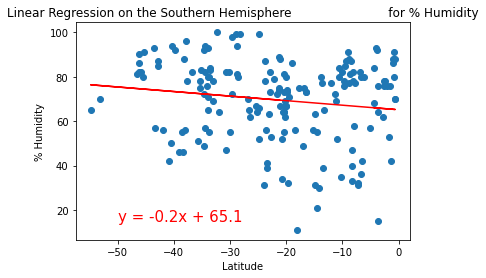

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

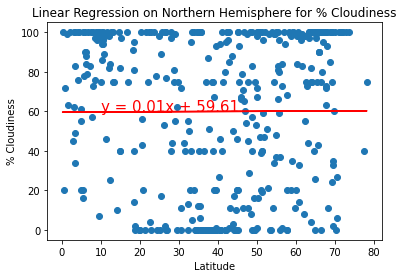

In [28]:
# Linear Regression on Northern Hemisphere for Percent Cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on Northern Hemisphere for % Cloudiness',
                       "% Cloudiness",(10, 60))

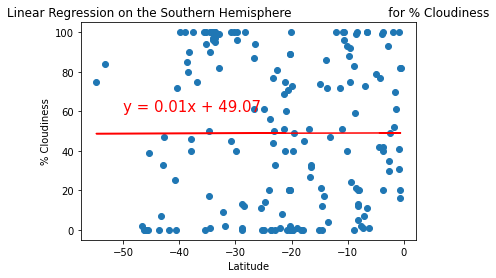

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

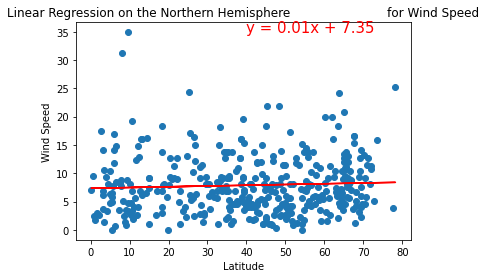

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

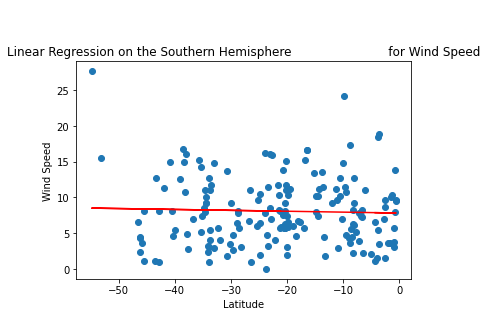

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))